In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Masters_Project/Code/tf2-ganomaly/

/content/drive/MyDrive/Masters_Project/Code/tf2-ganomaly


In [3]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from model import GANomaly
from absl import logging
logging.set_verbosity(logging.INFO)
logging.set_stderrthreshold(logging.INFO)

def batch_resize(imgs, size: tuple):
    img_out = np.empty((imgs.shape[0],) + size)
    for i in range(imgs.shape[0]):
        img_out[i] = cv2.resize(imgs[i], size, interpolation=cv2.INTER_CUBIC)
    return img_out

2.4.1


In [4]:
class Option:
    def __init__(self):
        self.anomaly = 2 # the anomaly digit
        self.shuffle_buffer_size = 10000
        self.batch_size = 300
        self.isize = 32 # input size
        self.ckpt_dir = "ckpt"
        self.nz = 100 # latent dims
        self.nc = 1 # input channels
        self.ndf = 64 # number of discriminator's filters
        self.ngf = 64 # number of generator's filters
        self.extralayers = 0
        self.niter = 15 # number of training epochs
        self.lr = 2e-4 
        self.w_adv = 1. # Adversarial loss weight
        self.w_con = 50. # Reconstruction loss weight
        self.w_enc = 1. # Encoder loss weight.
        self.beta1 = 0.5
        self.encdims = None
            
opt = Option()

In [5]:
# dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()
x_train, y_train = data_train
x_test, y_test = data_test
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# resize to (32, 32)
x_train = batch_resize(x_train, (32, 32))[..., None]
x_test = batch_resize(x_test, (32, 32))[..., None]
# normalization
mean = x_train.mean()
stddev = x_train.std()
x_train = (x_train-mean)/stddev
x_test = (x_test-mean)/stddev
print(x_train.shape, x_train.shape)
# define abnoraml data and normal
# training data only contains normal
x_train = x_train[y_train!=opt.anomaly]
y_train = y_train[y_train!=opt.anomaly]
y_test = (y_test==opt.anomaly).astype(np.float32)
# tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.shuffle(opt.shuffle_buffer_size).batch(opt.batch_size, drop_remainder=True)
test_dataset = test_dataset.batch(opt.batch_size, drop_remainder=False)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 32, 32, 1) (60000, 32, 32, 1)


In [6]:
ganomaly = GANomaly(opt, train_dataset, valid_dataset=None, test_dataset=test_dataset)

In [7]:
ganomaly.fit(opt.niter)

INFO:absl:epoch: 0, G_losses: 23.3298, D_losses: 0.6036, samples/sec: 2069.7007


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.5374   average_precision: 0.0997 ***


INFO:absl:epoch: 1, G_losses: 21.4763, D_losses: 0.0388, samples/sec: 7112.8054


INFO:absl:	 Testing:   roc_auc: 0.4962   average_precision: 0.1012


INFO:absl:epoch: 2, G_losses: 17.5695, D_losses: 0.0110, samples/sec: 7216.7035


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.8979   average_precision: 0.4410 ***


INFO:absl:epoch: 3, G_losses: 15.3879, D_losses: 0.0077, samples/sec: 7312.9900


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.9172   average_precision: 0.5607 ***


INFO:absl:epoch: 4, G_losses: 14.3358, D_losses: 0.0048, samples/sec: 7241.5165


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.9427   average_precision: 0.6336 ***


INFO:absl:epoch: 5, G_losses: 13.7423, D_losses: 0.0030, samples/sec: 7183.2127


INFO:absl:	 Testing:   roc_auc: 0.9368   average_precision: 0.5801


INFO:absl:epoch: 6, G_losses: 13.3525, D_losses: 0.0018, samples/sec: 7221.3836


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.9488   average_precision: 0.6117 ***


INFO:absl:epoch: 7, G_losses: 13.0591, D_losses: 0.0016, samples/sec: 7200.5189


Saving to: ckpt/best


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestgen/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets


INFO:tensorflow:Assets written to: ckpt/bestdisc/assets
INFO:absl:*** 	 Testing:   roc_auc: 0.9564   average_precision: 0.6399 ***


INFO:absl:epoch: 8, G_losses: 12.8644, D_losses: 0.0014, samples/sec: 7186.6622


INFO:absl:	 Testing:   roc_auc: 0.9497   average_precision: 0.6055


INFO:absl:epoch: 9, G_losses: 12.6870, D_losses: 0.0008, samples/sec: 7289.2138


INFO:absl:	 Testing:   roc_auc: 0.9334   average_precision: 0.5520


INFO:absl:epoch: 10, G_losses: 12.5526, D_losses: 0.0005, samples/sec: 7251.7453


INFO:absl:	 Testing:   roc_auc: 0.9495   average_precision: 0.5810


INFO:absl:epoch: 11, G_losses: 12.4393, D_losses: 0.0005, samples/sec: 7203.5168


INFO:absl:	 Testing:   roc_auc: 0.9504   average_precision: 0.5845


INFO:absl:epoch: 12, G_losses: 12.3686, D_losses: 0.0005, samples/sec: 7315.5082


INFO:absl:	 Testing:   roc_auc: 0.9442   average_precision: 0.5808


INFO:absl:epoch: 13, G_losses: 12.2706, D_losses: 0.0003, samples/sec: 7226.3401


INFO:absl:	 Testing:   roc_auc: 0.9370   average_precision: 0.5564


INFO:absl:epoch: 14, G_losses: 12.2031, D_losses: 0.0003, samples/sec: 7225.6910


INFO:absl:	 Testing:   roc_auc: 0.9463   average_precision: 0.5872


Loading from: ckpt/best


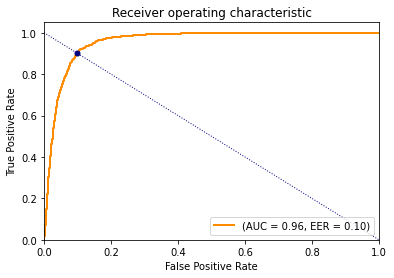

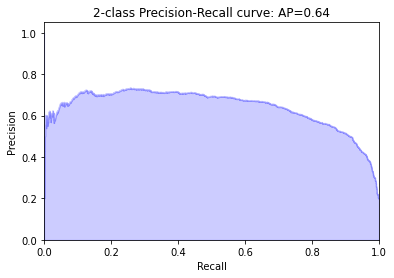

In [8]:
ganomaly.evaluate_best(test_dataset)

In [9]:
!pwd

/content/drive/MyDrive/Masters_Project/Code/tf2-ganomaly


In [10]:
ganomaly.save('./output/')

Saving to: ./output/


INFO:tensorflow:Assets written to: ./output/gen/assets


INFO:tensorflow:Assets written to: ./output/gen/assets


INFO:tensorflow:Assets written to: ./output/disc/assets


INFO:tensorflow:Assets written to: ./output/disc/assets
